## Introduction to the data set

In [16]:
import pandas as pd
import numpy as np
#Specifying column names as a parameter so that pandas reads in the dataset properly
cols = ["symboling","normalized-losses","make","fuel-type","aspiration",
       "num-doors", "body-style","drive-wheels","engine-location","wheel-base",
       "length","width","height","curb-weight","engine-type","num-cylinders",
       "engine-size","fuel-system","bore","stroke","compression-ratio",
       "horsepower","peak-rpm", "city-mpg","highway-mpg", "price"]
cars = pd.read_csv("imports-85.data", names = cols)
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


## Data Cleaning

In [17]:
cars = cars.replace("?",np.nan)
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [18]:
numeric_cars = numeric_cars.astype(float)
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [19]:
numeric_cars = numeric_cars.dropna(subset = ["price"])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [20]:
#Replacing missing values with the respective column means
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
# Checking if there are null values left in any column
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [21]:
#Normalizing every column except the price column
price_col = numeric_cars["price"]
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars["price"] = price_col
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate model

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col,target_col,df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    # Randomizing order of rows in dataframe
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Dividing the number of rows in half and rounding
    last_train_row = int(len(rand_df)/2)
    
    #Select first half as training set and second half as test set
    train_df = rand_df.iloc[:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using the default k-value
    knn.fit(train_df[[train_col]],train_df[target_col])
    
    # Make predictions using the model
    predicted_labels = knn.predict(test_df[[train_col]])
    
    # RMSE
    mse = mean_squared_error(predicted_labels,test_df[target_col])
    rmse = np.sqrt(mse)
    return rmse

rmse_values = {}
train_cols = numeric_cars.columns.drop("price")
for col in train_cols:
    val = knn_train_test(col,"price",numeric_cars)
    rmse_values[col] = val

# Converting the dictionary to a series object
rmse_values = pd.Series(rmse_values)
rmse_values.sort_values()

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-ratio    6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

## Using different n_neighbors values

In [23]:
def knn_train_test(feature_col,target_col,df):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    last_train_row = int(len(rand_df)/2)
    train_df = rand_df.iloc[:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    k_values = [1,3,5,7,9]
    k_rmses = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[[feature_col]],train_df[target_col])
        label = knn.predict(test_df[[feature_col]])
        mse = mean_squared_error(label, test_df[target_col])
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses
feature_cols = numeric_cars.columns.drop("price")
g = {}
for col in feature_cols:
    val = knn_train_test(col,"price",numeric_cars)
    g[col] = val
g

{'bore': {1: 8602.5884845006603,
  3: 6984.2394894809158,
  5: 6780.6277846859757,
  7: 6878.0979659215318,
  9: 6866.8085020384133},
 'city-mpg': {1: 5901.1435743547636,
  3: 4646.7464087271546,
  5: 4766.4225050901341,
  7: 5232.5230341673159,
  9: 5465.2094925275333},
 'compression-ratio': {1: 8087.205346523092,
  3: 7375.0636855783587,
  5: 6610.8121531591287,
  7: 6732.8012829415147,
  9: 7024.4855254634349},
 'curb-weight': {1: 5264.2902307588784,
  3: 5022.3180117572329,
  5: 4401.1182547931239,
  7: 4330.6081044180528,
  9: 4632.0444744544011},
 'height': {1: 8904.0464563607093,
  3: 8277.6096430455254,
  5: 8144.4410426637469,
  7: 7679.5981243937731,
  9: 7811.0360629122297},
 'highway-mpg': {1: 6025.5949667207387,
  3: 4617.3050197885541,
  5: 4630.0267985880564,
  7: 4796.0614401869461,
  9: 5278.3580569539872},
 'horsepower': {1: 4170.0548480378011,
  3: 4020.8492630885394,
  5: 4037.0377131537603,
  7: 4353.8118602771337,
  9: 4515.1356174191033},
 'length': {1: 4628.4555

In [26]:
# Computing average RMSE for each feature
avg_vals = {}
for k,v in g.items():
    val = np.mean(list(v.values()))
    avg_vals[k] = val
avg_vals = pd.Series(avg_vals)
avg_vals.sort_values()

horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-ratio    7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

## Multivariate Model

In [29]:
def knn_train_test(feature_cols,target_col,df):
    knn = KNeighborsRegressor() # n_neighbors = 5
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    last_train_row = int(len(rand_df)/2)
    train_df = rand_df[:last_train_row]
    test_df = rand_df[last_train_row:]
    knn.fit(train_df[feature_cols],train_df[target_col])
    labels = knn.predict(test_df[feature_cols])
    mse = mean_squared_error(labels,test_df[target_col])
    rmse = mse**0.5
    return rmse
two_best = ["horsepower","width"]
three_best = ["horsepower","width","curb-weight"]
four_best = ["horsepower","width","curb-weight","city-mpg"]
five_best = ["horsepower","width","curb-weight","city-mpg","highway-mpg"]
six_best = ["horsepower","width","curb-weight","city-mpg","highway-mpg","length"]
two_rmse = knn_train_test(two_best,"price",numeric_cars)
three_rmse = knn_train_test(three_best,"price",numeric_cars)
four_rmse = knn_train_test(four_best,"price",numeric_cars)
five_rmse = knn_train_test(five_best,"price",numeric_cars)
six_rmse = knn_train_test(six_best,"price",numeric_cars)
u = {
    "two features": two_rmse,
    "three features": three_rmse,
    "four features": four_rmse,
    "five features": five_rmse,
    "six features": six_rmse
}
u

{'five features': 3341.6024539726504,
 'four features': 3280.3807311630976,
 'six features': 3628.2611882141268,
 'three features': 3305.9401397969677,
 'two features': 3589.3132622073304}

In [30]:
# Hyperparameter tuning for the top 3 models in the last step
def knn_train_test(feature_cols,target_col,df):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    last_train_row = int(len(rand_df)/2)
    train_df = rand_df[:last_train_row]
    test_df = rand_df[last_train_row:]
    k_values = [i for i in range(1,26)]
    k_rmses = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[feature_cols],train_df[target_col])
        labels = knn.predict(test_df[feature_cols])
        mse = mean_squared_error(labels,test_df[target_col])
        rmse = mse**0.5
        k_rmses[k] = rmse
    return k_rmses
k_rmse_vals = {}
val = knn_train_test(three_best,"price",numeric_cars)
k_rmse_vals["three best"] = val
val = knn_train_test(four_best,"price",numeric_cars)
k_rmse_vals["four best"] = val
val = knn_train_test(five_best,"price",numeric_cars)
k_rmse_vals["five best"] = val
k_rmse_vals

{'five best': {1: 2530.0554077602005,
  2: 2897.1757974767684,
  3: 3183.4597426217424,
  4: 3168.0230415758415,
  5: 3341.6024539726504,
  6: 3537.5205429981911,
  7: 3817.2904521188252,
  8: 4004.4145296855731,
  9: 3992.3186041830318,
  10: 4138.7287878533352,
  11: 4342.0528528290979,
  12: 4416.1453810311359,
  13: 4493.8798141857205,
  14: 4463.5016015545707,
  15: 4474.480783207805,
  16: 4553.5595362768345,
  17: 4597.001081375769,
  18: 4655.283442648355,
  19: 4687.9008939828218,
  20: 4712.0229855431653,
  21: 4755.8566258237734,
  22: 4788.162720030673,
  23: 4806.9233819650544,
  24: 4879.983352195467,
  25: 4923.8448430324688},
 'four best': {1: 2516.5892799502258,
  2: 2811.1727257604443,
  3: 3013.3615157930335,
  4: 3126.2694826412612,
  5: 3280.3807311630976,
  6: 3479.5099401018138,
  7: 3781.5612742414464,
  8: 3988.8669577450623,
  9: 4024.9986213622451,
  10: 4042.2472261878988,
  11: 4230.3352486840677,
  12: 4354.0086751540612,
  13: 4461.6266648777882,
  14: 44

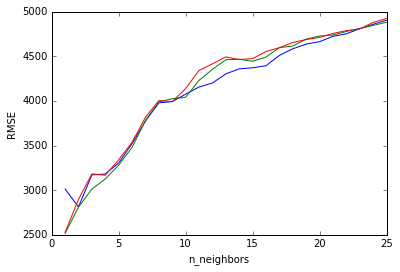

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
for k,v in k_rmse_vals.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y)
    plt.xlabel("n_neighbors")
    plt.ylabel("RMSE")